<font size="5">**2. Data Preprocessing**</font>

<font size="4">**2.1 Import Packages**</font>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

<font size="4">**2.2 Import Dataset**</font>

In [127]:
data = pd.read_csv("/content/fraud_oracle.csv")

In [12]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


<font size="4">**2.3 Data Preprocessing**</font>

<font size="3.5">**2.3.1 Drop Irrelevant Columns**</font>

In [128]:
data = data.drop(columns=['PolicyNumber','RepNumber','Year'])

In [6]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision


<font size="3.5">**2.3.2 Fill in Missing Values**</font>

In [129]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
BasePolicy              0
dtype: int64

There is no missing value in our dataset

But as we see from the data exploration part:

DayOfWeekClaimed - contains a 0 instead of a day of the week

MonthClaimed - contains a 0 instead of the month 

Age - contains a 0 instead of the necessary age

So we will deal with these issues now.

In [106]:
#Investigate the 0 in DayOfWeekClaimed and MonthClaimed
print('DayOfWeekClaimed has ', len(data.loc[(data['DayOfWeekClaimed']=='0')]), ' row(s) with a 0')
print('MonthClaimed has ',len(data.loc[(data['MonthClaimed']=='0')]),' row(s) with a 0') 
print(' ')

DayOfWeekClaimed has  1  row(s) with a 0
MonthClaimed has  1  row(s) with a 0
 


In [130]:
#Since both DayOfWeekClaimed and MonthClaimed are 0 for the same entry, I will drop
data = data.loc[data['DayOfWeekClaimed']!='0']

In [109]:
#There are 319 rows where the feature Age is assigned a zero, 
print(len(data[data['Age']==0]))

319


In [131]:
data.loc[data['Age']==0, 'AgeOfPolicyHolder']
#every row with Age=0, has a Policy Holder that is aged between 16 and 17 years.

7        16 to 17
13       16 to 17
28       16 to 17
31       16 to 17
58       16 to 17
           ...   
15243    16 to 17
15262    16 to 17
15274    16 to 17
15379    16 to 17
15392    16 to 17
Name: AgeOfPolicyHolder, Length: 319, dtype: object

In [132]:
print(len(data.loc[list(rw_idx),('Age','AgeOfPolicyHolder')]))
data.loc[list(rw_idx),('Age','AgeOfPolicyHolder')].head()

720


,Age,AgeOfPolicyHolder
0,21,26 to 30
4,27,31 to 35
5,20,21 to 25
7,0,16 to 17
8,30,31 to 35


In [133]:
#Assigns an age of 16.5 to all rows with missing Age values
data_age0_idx = (data['Age']==0)
data.loc[list(data_age0_idx),'Age']=16.5

<font size="4">**2.4 Variable Correlation**</font>

In [134]:
corr = data.corr()['FraudFound_P'].sort_values()

print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
Age                  -0.027509
WeekOfMonth          -0.011872
WeekOfMonthClaimed   -0.005783
DriverRating          0.007259
Deductible            0.017345
FraudFound_P          1.000000
Name: FraudFound_P, dtype: float64

Top 10 - Negative Correlations:
------------------------------
Age                  -0.027509
WeekOfMonth          -0.011872
WeekOfMonthClaimed   -0.005783
DriverRating          0.007259
Deductible            0.017345
FraudFound_P          1.000000
Name: FraudFound_P, dtype: float64


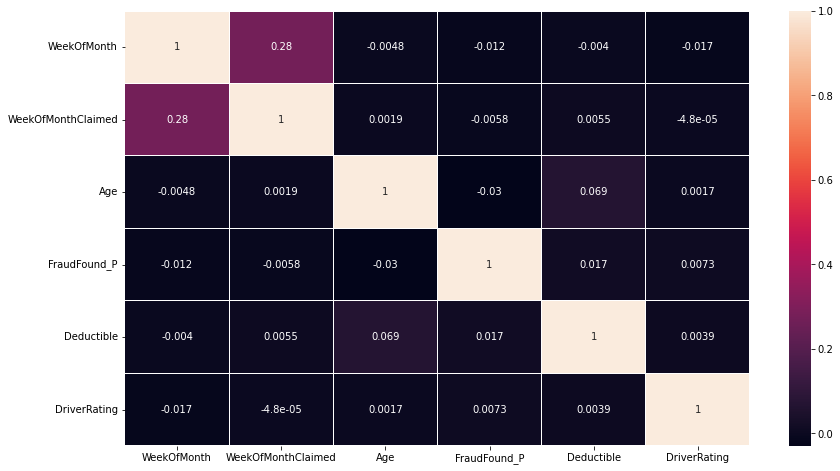

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot = True,  linewidths=.05) 

<font size="3.5">**Insights**</font><br>We consider variables are highly correlated when > 0.80 :<br>
--> there is no high correlation between variables

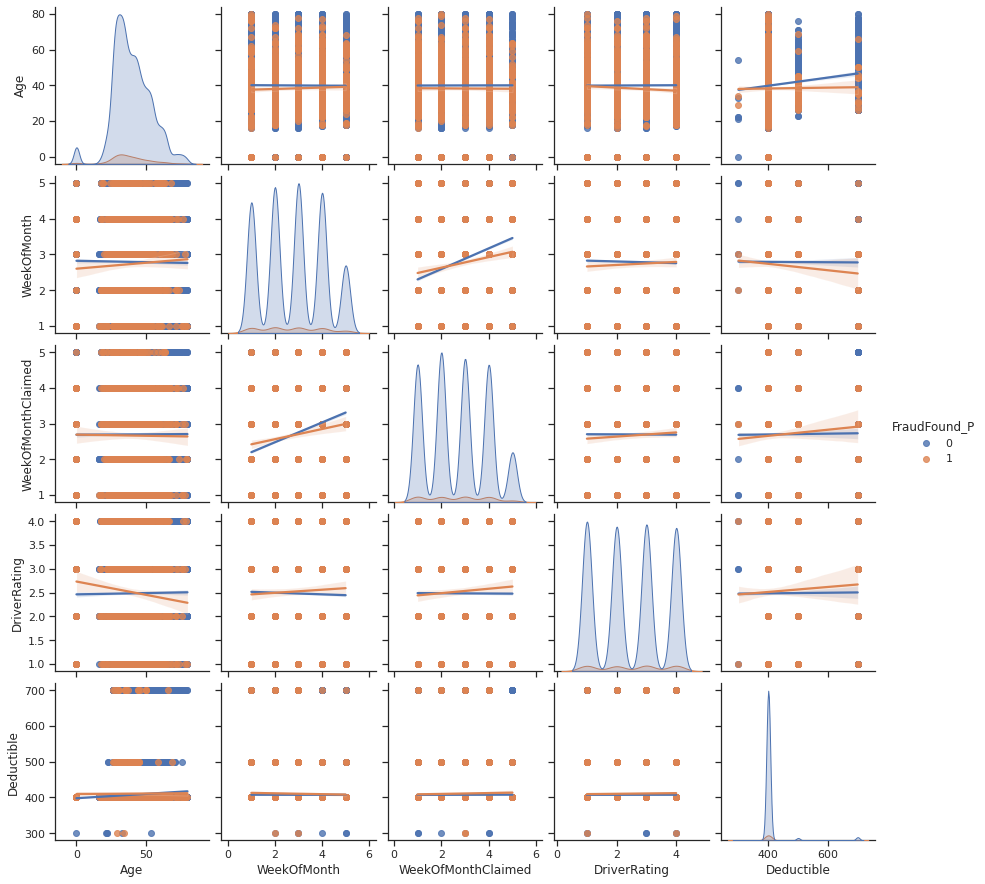

In [10]:
sns.set(style="ticks")

vars= ["Age", "WeekOfMonth", "WeekOfMonthClaimed","DriverRating","Deductible"]

p = pairplot(data, vars=vars, hue="FraudFound_P", kind="reg")

<font size="4">**2.5.1 Specific data types of Columns**</font>

Text(0, 0.5, 'Data type')

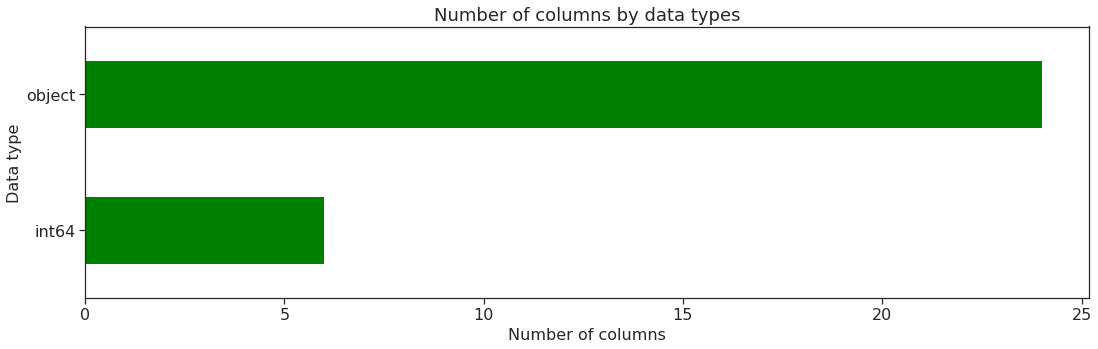

In [12]:
data.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(18, 5),
                                            fontsize=16,
                                           color="green")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

<font size="4">**2.5.2 Number of Categories for each object data**</font>

In [13]:
data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Month                   12
DayOfWeek                7
Make                    19
AccidentArea             2
DayOfWeekClaimed         8
MonthClaimed            13
Sex                      2
MaritalStatus            4
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
Days_Policy_Accident     5
Days_Policy_Claim        4
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

<font size="4">**2.5.3 Visualize Distribution of Categorical Variables**</font>

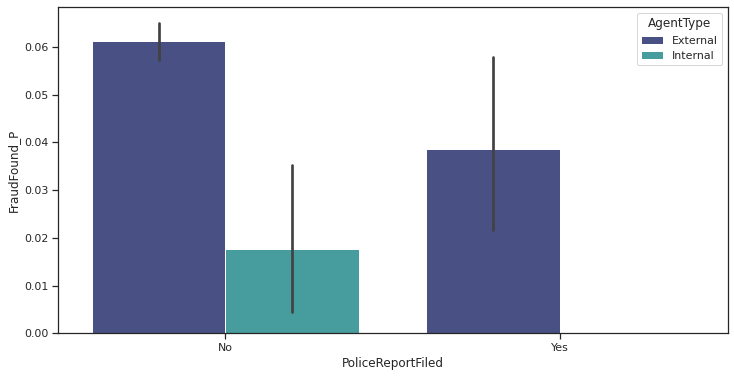

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x="PoliceReportFiled", y= "FraudFound_P", hue="AgentType", data=data,palette='mako')

<font size="3.5">**Insights**</font><br>There is no filed policy report for those who buy auto insurance through internal agent.

Text(0.5, 1.0, 'Number of claim applications are fraudulent')

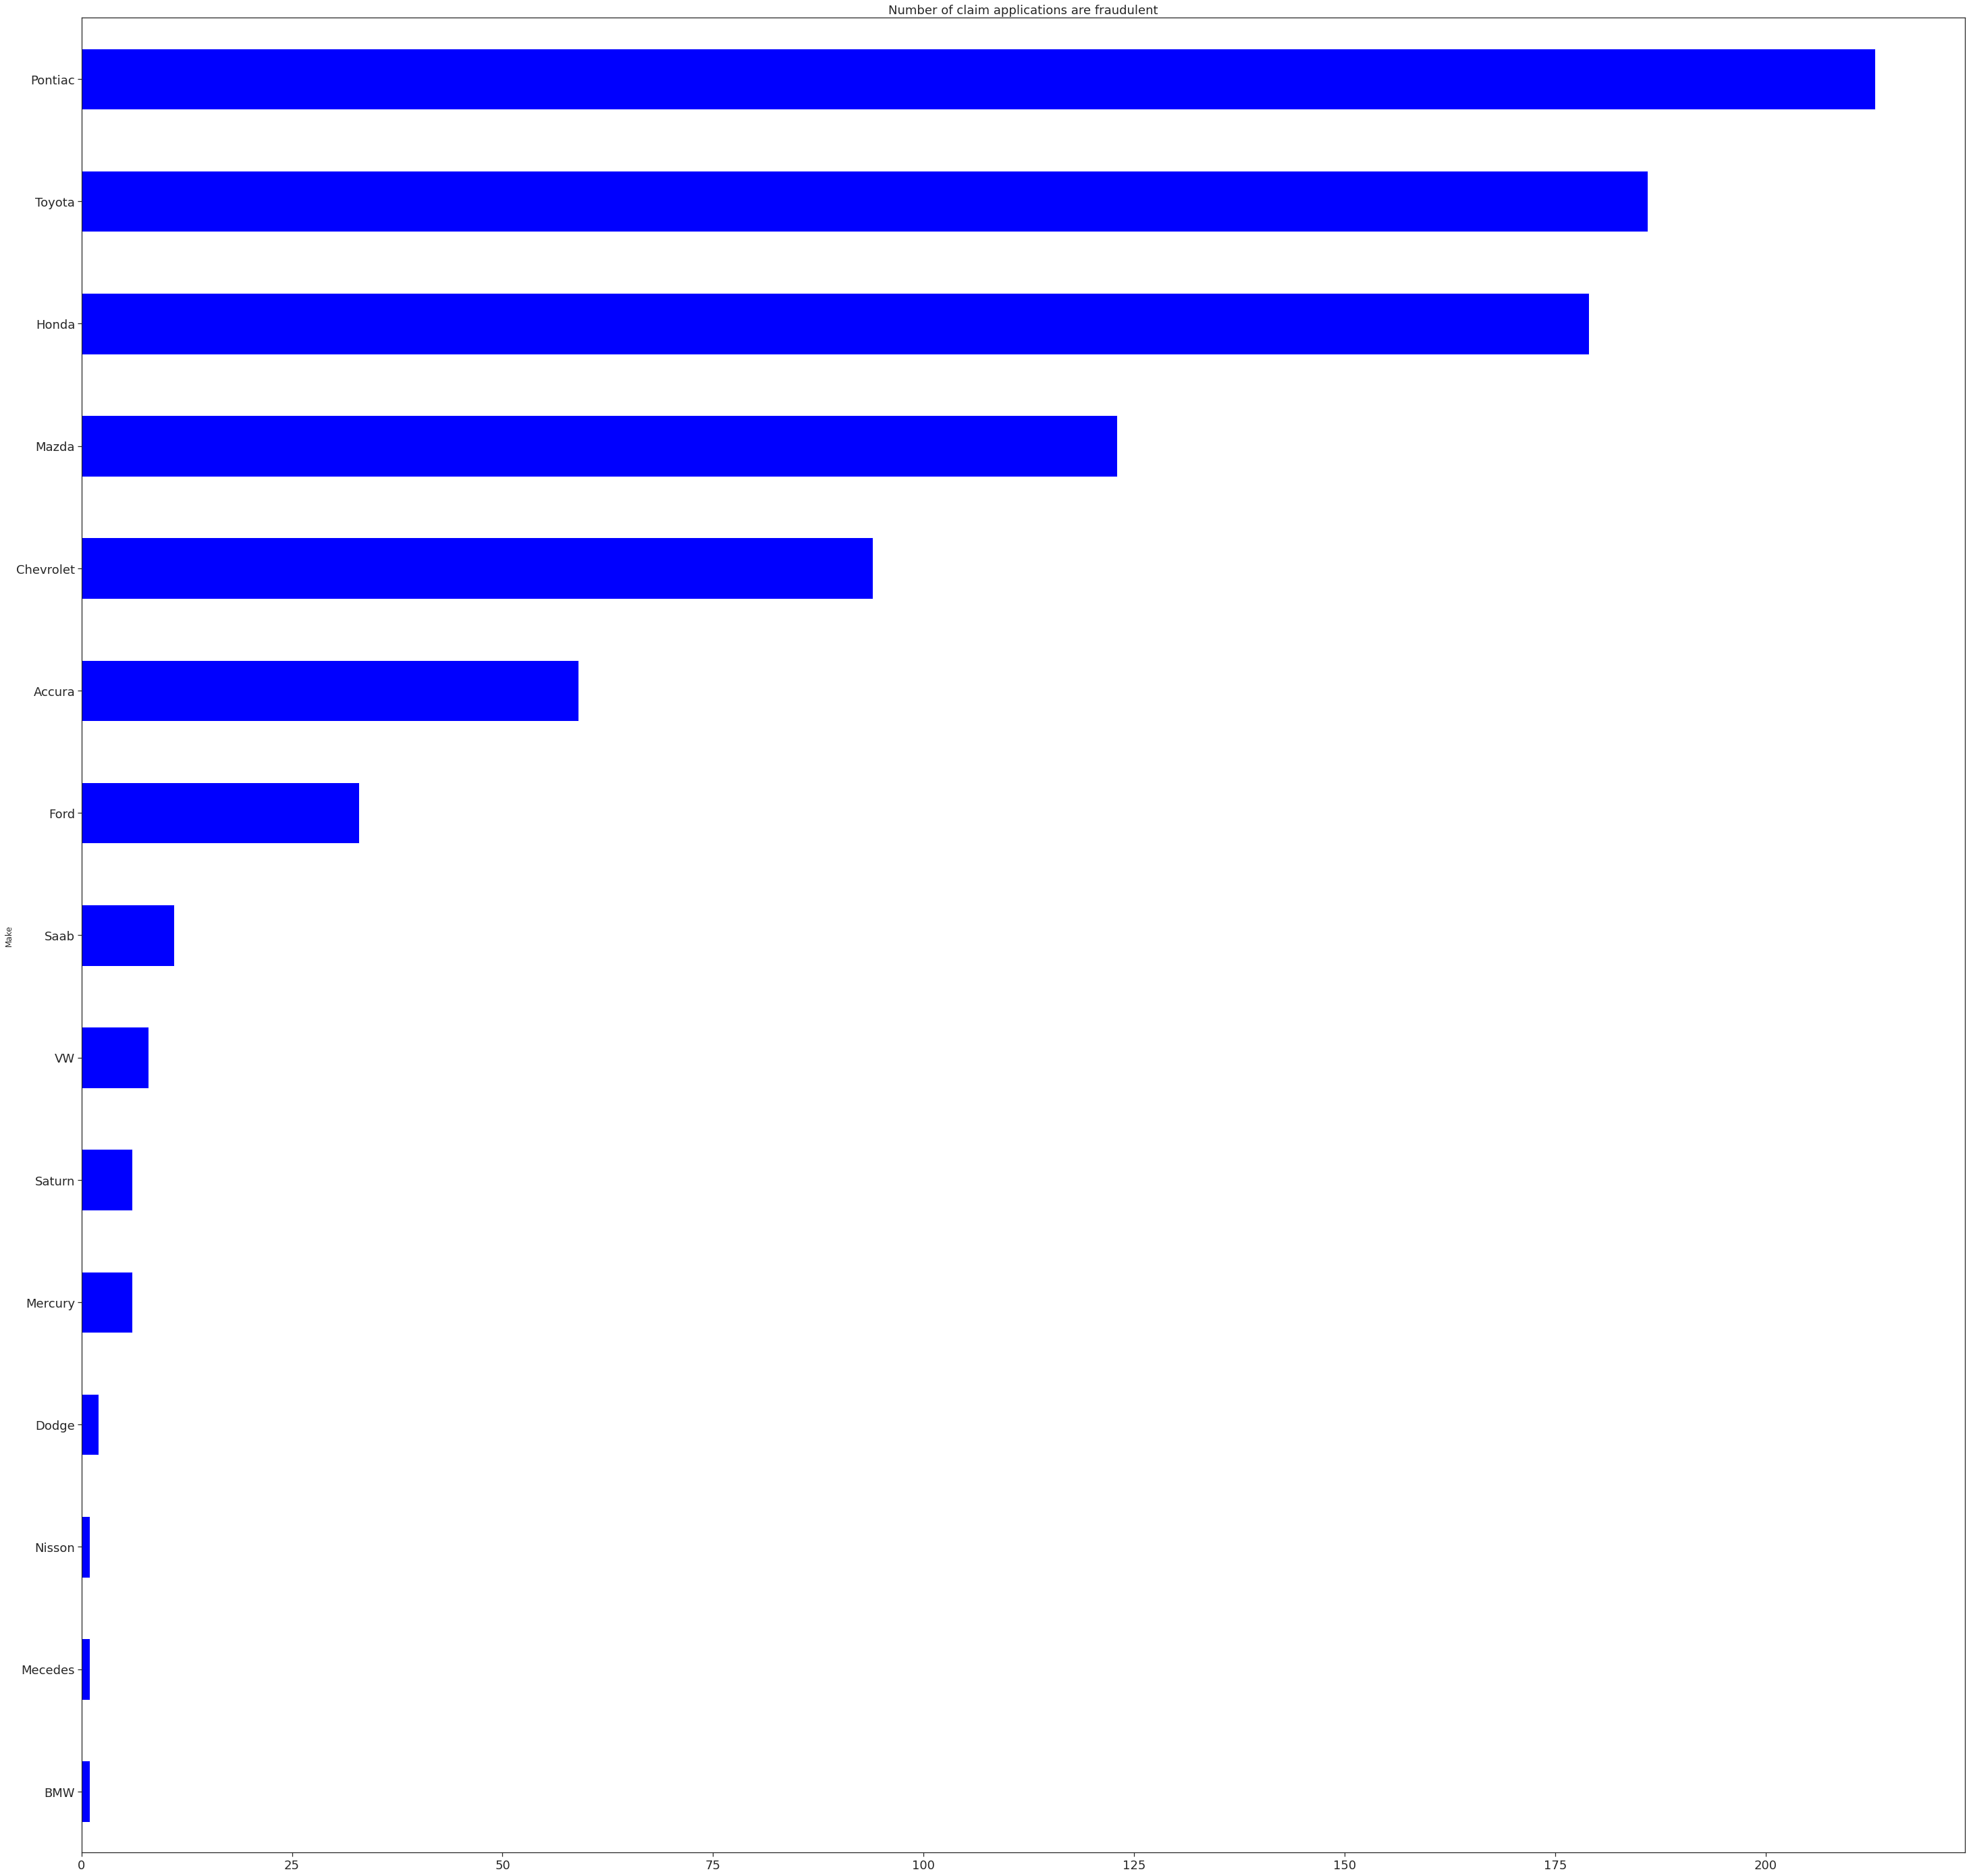

In [15]:
fig = plt.figure(figsize=(50,50))
data[data['FraudFound_P'] == 1].groupby(
    'Make')['FraudFound_P'].count().sort_values().plot(kind='barh',fontsize=18, color="blue")

plt.title('Number of claim applications are fraudulent', fontsize=18)

<font size="4">**2.6.1 Encoding Categorical Variables**</font>

In [135]:
from sklearn.preprocessing import OrdinalEncoder

data_cat = data[['Month','DayOfWeek','Make','DayOfWeekClaimed','MonthClaimed','MaritalStatus',
                 'PolicyType','VehicleCategory','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                 'PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments',
                 'AddressChange_Claim','NumberOfCars','BasePolicy']]

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)

In [136]:
from sklearn import preprocessing

data_cat_label = data[['AccidentArea','Sex','Fault','PoliceReportFiled','WitnessPresent','AgentType']]

label_encoder = preprocessing.LabelEncoder() 
data_cat_label_encoded = data_cat_label.apply(lambda col: label_encoder.fit_transform(col))

In [137]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
data_cat_encoded_scaled = min_max_scaler.fit_transform(data_cat_encoded)
data_cat_label_encoded_scaled = min_max_scaler.fit_transform(data_cat_label_encoded)

data_cat_encoded_scaled = pd.DataFrame(data_cat_encoded_scaled,columns=['Month','DayOfWeek','Make','DayOfWeekClaimed','MonthClaimed','MaritalStatus',
                 'PolicyType','VehicleCategory','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                 'PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments',
                 'AddressChange_Claim','NumberOfCars','BasePolicy'])
data_cat_label_encoded_scaled = pd.DataFrame(data_cat_label_encoded_scaled,
                                             columns=['AccidentArea','Sex','Fault','PoliceReportFiled','WitnessPresent','AgentType'])

<font size="4">**2.6.2 Standardizing Numeric Variables**</font>

In [138]:
data_num = data[['WeekOfMonth','WeekOfMonthClaimed','Age','Deductible','DriverRating']]
data_num_scaled = min_max_scaler.fit_transform(data_num)
data_num_scaled = pd.DataFrame(data_num_scaled,columns=['WeekOfMonth','WeekOfMonthClaimed','Age',
                                                        'Deductible','DriverRating'])                               

In [139]:
y = data[['FraudFound_P']]
y = pd.DataFrame(y,columns=['FraudFound_P'])
data = pd.concat([y,data_cat_encoded_scaled,data_cat_label_encoded,data_num_scaled], axis=1, join='inner')
data.head()

,FraudFound_P,Month,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,MaritalStatus,PolicyType,VehicleCategory,VehiclePrice,...,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType,WeekOfMonth,WeekOfMonthClaimed,Age,Deductible,DriverRating
0,0,-0.636364,1.000000,-0.333333,0.666667,-0.272727,0.333333,0.25,0.0,1.0,...,0,0,0,0,0,1.0,-1.0,-0.84375,-1.0,-1.000000
1,0,-0.272727,1.000000,-0.333333,-0.666667,-0.272727,0.333333,0.00,0.0,1.0,...,1,0,1,0,0,0.0,0.5,-0.43750,-0.5,1.000000
2,0,0.818182,-1.000000,-0.333333,0.333333,0.636364,-0.333333,0.00,0.0,1.0,...,1,0,0,0,0,1.0,-0.5,-0.03125,-0.5,0.333333
3,0,0.090909,-0.333333,0.888889,-1.000000,-0.090909,-0.333333,-0.50,0.0,-1.0,...,1,1,1,0,0,-0.5,-1.0,0.53125,-0.5,-0.333333
4,0,-0.272727,-0.666667,-0.333333,0.666667,-0.454545,0.333333,0.00,0.0,1.0,...,0,1,0,0,0,1.0,-0.5,-0.65625,-0.5,-1.000000


<font size="4">**2.7 Outlier Detection**</font>

Text(0.5, 1.0, 'The boxplot to study outliers')

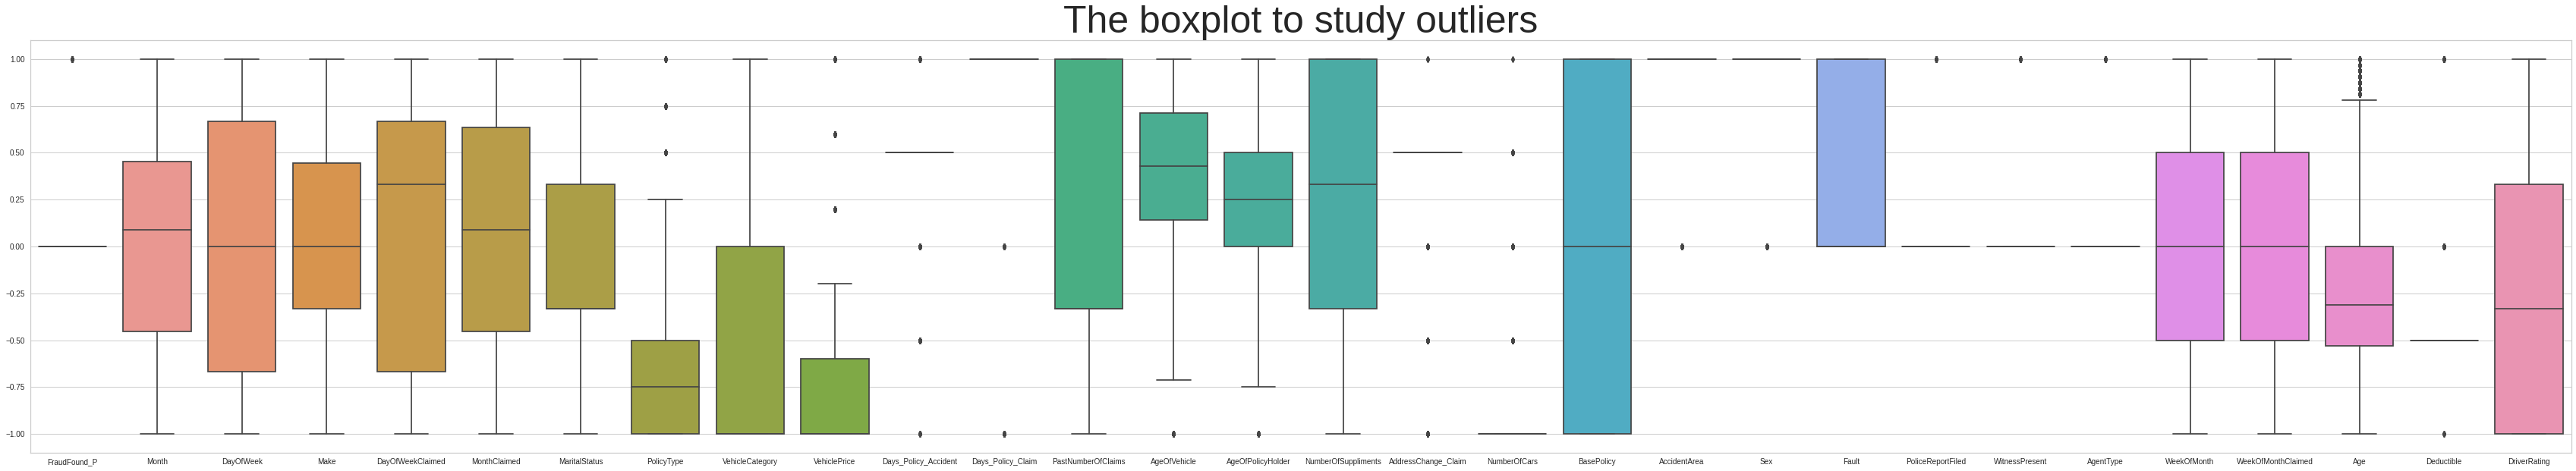

In [140]:
plt.figure(figsize=(60,10))
sns.boxplot(data=data)
plt.title('The boxplot to study outliers',fontsize=50)

most outlier variables located in the "PolicyType","VehiclePrice"

In [141]:
from sklearn.ensemble import IsolationForest # Return the anomaly score 

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(data)
score = iforest.decision_function(data)

from numpy import where
anom_index = where(pred== -1)
values = data.iloc[anom_index]
values

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,FraudFound_P,Month,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,MaritalStatus,PolicyType,VehicleCategory,VehiclePrice,...,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType,WeekOfMonth,WeekOfMonthClaimed,Age,Deductible,DriverRating
0,0,-0.636364,1.000000,-0.333333,0.666667,-0.272727,0.333333,0.25,0.0,1.0,...,0,0,0,0,0,1.0,-1.0,-0.843750,-1.0,-1.000000
3,0,0.090909,-0.333333,0.888889,-1.000000,-0.090909,-0.333333,-0.50,0.0,-1.0,...,1,1,1,0,0,-0.5,-1.0,0.531250,-0.5,-0.333333
113,1,0.636364,0.333333,-1.000000,0.666667,-0.272727,-0.333333,0.50,1.0,1.0,...,1,0,0,0,0,0.5,-0.5,0.250000,-0.5,-0.333333
119,1,-0.636364,-1.000000,-0.333333,-1.000000,-0.636364,0.333333,-1.00,-1.0,1.0,...,1,0,0,0,0,-1.0,0.0,-0.984375,-0.5,0.333333
121,0,0.818182,1.000000,-0.333333,-0.666667,0.818182,-0.333333,0.00,0.0,1.0,...,0,1,0,0,0,-0.5,0.0,-0.937500,-0.5,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15282,0,0.818182,1.000000,-0.777778,-1.000000,0.818182,-0.333333,0.50,1.0,1.0,...,0,0,0,0,0,-0.5,0.0,-0.250000,1.0,-0.333333
15288,0,-0.818182,1.000000,-0.777778,0.333333,-0.818182,0.333333,0.50,1.0,1.0,...,1,1,0,0,0,-1.0,-0.5,0.656250,-0.5,-0.333333
15308,1,0.272727,0.333333,-0.777778,-0.666667,-1.000000,-0.333333,-0.50,0.0,-0.6,...,1,0,0,0,0,1.0,-1.0,-0.187500,-0.5,-0.333333
15378,0,-0.272727,0.666667,-0.333333,0.333333,-0.272727,0.333333,0.50,1.0,1.0,...,1,0,0,0,0,-0.5,-0.5,-0.984375,-0.5,0.333333


There are 309 outiliers detected.<br> Then remove the outliers

In [142]:
data = data[~data.index.isin(values.index)]
data.shape

(15109, 30)

In [148]:
data.to_csv("cleaned_data.csv")
#this is the clean data after data preprocessing

2.8 Imbalanced data correction 

As a lot of variables are imbalanced ,e.g,FraudFound_P

(not sure whether we should do this)

In [145]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=5)
X_train_smoteen, y_train_smoteen = smote_enn.fit_resample(X_train, y_train)

sampledtrain_dataset = pd.merge(X_train_smoteen, y_train_smoteen, left_index=True, right_index=True)
sampledtrain_dataset.to_csv("Fraud_sampledtrain.csv")

In [146]:
sampledtrain_dataset["FraudFound_P"].value_counts()
#this is the clean data after dealing with the imbalanced issue

1    10001
0     7094
Name: FraudFound_P, dtype: int64

 <font size="5">**3.Feature Engineering**<font>

3.1 Feature Selection

In [149]:
data = pd.read_csv("/content/cleaned_data.csv")

In [150]:
y=data[['FraudFound_P']]
X=data.drop(columns=['FraudFound_P'])

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

3.1.1 Mutual Information

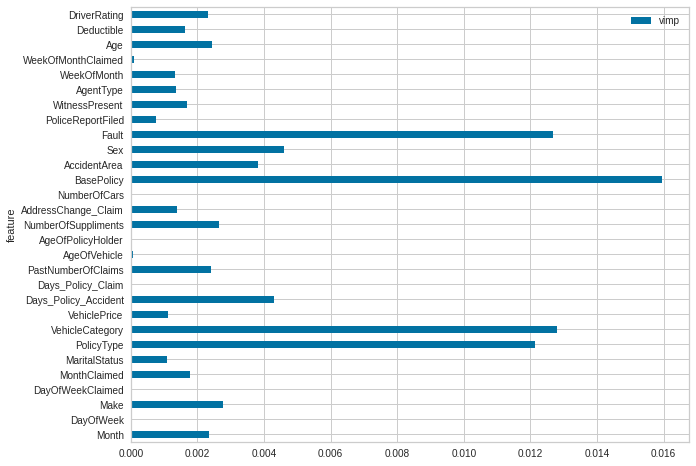

In [144]:
from sklearn import feature_selection
mic = feature_selection.mutual_info_classif(
X_train, y_train
)
fig, ax = plt.subplots(figsize=(10, 8))
(
pd.DataFrame(
{"feature": X.columns, "vimp": mic}
)
.set_index("feature")
.plot.barh(ax=ax)
)

In [ ]:
3.1.2 RFE

In [62]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)
X.columns[rfe.support_]


Index(['Month', 'DayOfWeek', 'Make', 'DayOfWeekClaimed', 'MonthClaimed',
       'AgeOfVehicle', 'WeekOfMonth', 'WeekOfMonthClaimed', 'Age',
       'DriverRating'],
      dtype='object')

3.1.3 Selecting features with Sequential Feature Selection(will take time!)

In [147]:
from time import time
from sklearn.feature_selection import SequentialFeatureSelector
feature_names = X.columns
tic_fwd = time()
sfs_forward = SequentialFeatureSelector(lasso, n_features_to_select=2,
direction='forward').fit(X_train, y_train)
toc_fwd = time()
tic_bwd = time()
sfs_backward = SequentialFeatureSelector(lasso, n_features_to_select=2,
direction='backward').fit(X_train, y_train)
toc_bwd = time()
print("Features selected by forward sequential selection: "
f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print("Features selected by backward sequential selection: "
f"{feature_names[sfs_backward.get_support()]}")
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

KeyboardInterrupt: ignored

3.1.4 Feature Importance


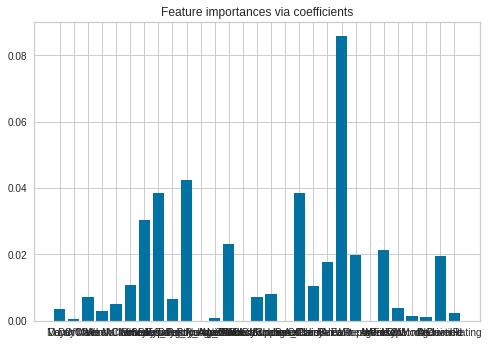

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
lasso = LassoCV().fit(X_train, y_train)
importance = np.abs(lasso.coef_)
feature_names = X.columns
tic_fwd = time()
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [79]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=5)
forest_reg.fit(X_train,y_train)

features = pd.DataFrame(list(zip(X_train.columns,forest_reg.feature_importances_)), columns = ['predictor', 'feature importance']).sort_values(ascending=False, by = 'feature importance')
features

,predictor,feature importance
26,Age,0.129235
1,DayOfWeek,0.071356
4,MonthClaimed,0.070084
0,Month,0.067711
2,Make,0.066341
3,DayOfWeekClaimed,0.063471
24,WeekOfMonth,0.055062
25,WeekOfMonthClaimed,0.052606
28,DriverRating,0.050421
12,AgeOfVehicle,0.046407


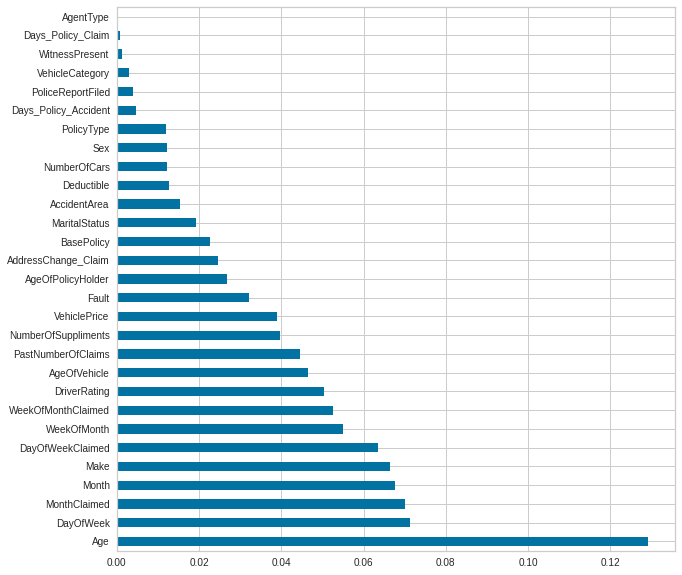

In [80]:
features = pd.Series(forest_reg.feature_importances_, index=X_train.columns)
features.nlargest(33).plot(kind='barh',figsize=(10,10))
plt.show()

At this point, we will only remove the least important variable should be removed :"Agent Type"

In [ ]:
X_train = X_train.drop(['Agent Type'], axis=1)

X_test= X_test.drop(['Agent Type'], axis=1)